In [136]:
#import scikit's Random Forest library
from sklearn.ensemble import RandomForestClassifier

#Loading pandas
import pandas as pd

#loading tree visualizations
import matplotlib.pyplot as plt

#Loads model performance
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [137]:
#Creating an object for zoo dataset
zoo = pd.read_csv('zoo.csv')

#Creating an object for zoo class dataset
zoo_class = pd.read_csv('class.csv')

#Printng out the dataset info
print(zoo)
print(zoo_class)

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

In [138]:
#Viewing the top 10 rows of the dataset
zoo.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [139]:
#Viewing the 
zoo_class.head(10)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [140]:
print(zoo['class_type'])

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: class_type, Length: 101, dtype: int64


In [141]:
zoo_class["Class_Number"].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [142]:
zoo_class["Class_Type"].unique()

array(['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug',
       'Invertebrate'], dtype=object)

In [143]:
zoo['species'] = pd.Categorical.from_codes(zoo.class_type, categories= ['None','Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug',
       'Invertebrate'])

zoo.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,species
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,Mammal
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4,Fish
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1,Mammal


In [144]:
#loading train and testing utility functions
from sklearn.model_selection import train_test_split

x = zoo.iloc[:, 1:17]

y = zoo.iloc[:, 17]
#Splitting dataset into a trainig dataset and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [145]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf.fit(x_train, y_train)

rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035)]

In [146]:
y_predict = rf.predict(x_test)

In [147]:
accuracy = accuracy_score(y_test, y_predict)

print("The accuracy of test data: ", accuracy)

The accuracy of test data:  1.0


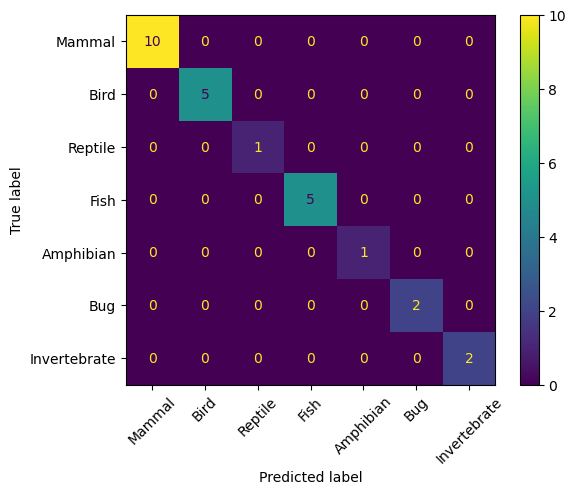

In [148]:
cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_predict), display_labels = zoo_class["Class_Type"].unique())

cm.plot(xticks_rotation = 45)

plt.show()

In [149]:
#Creating a list of the feature column names
features = zoo.columns[1:17]

#Viewing features
features

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [150]:
target = zoo_class["Class_Type"].unique()

target

array(['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug',
       'Invertebrate'], dtype=object)

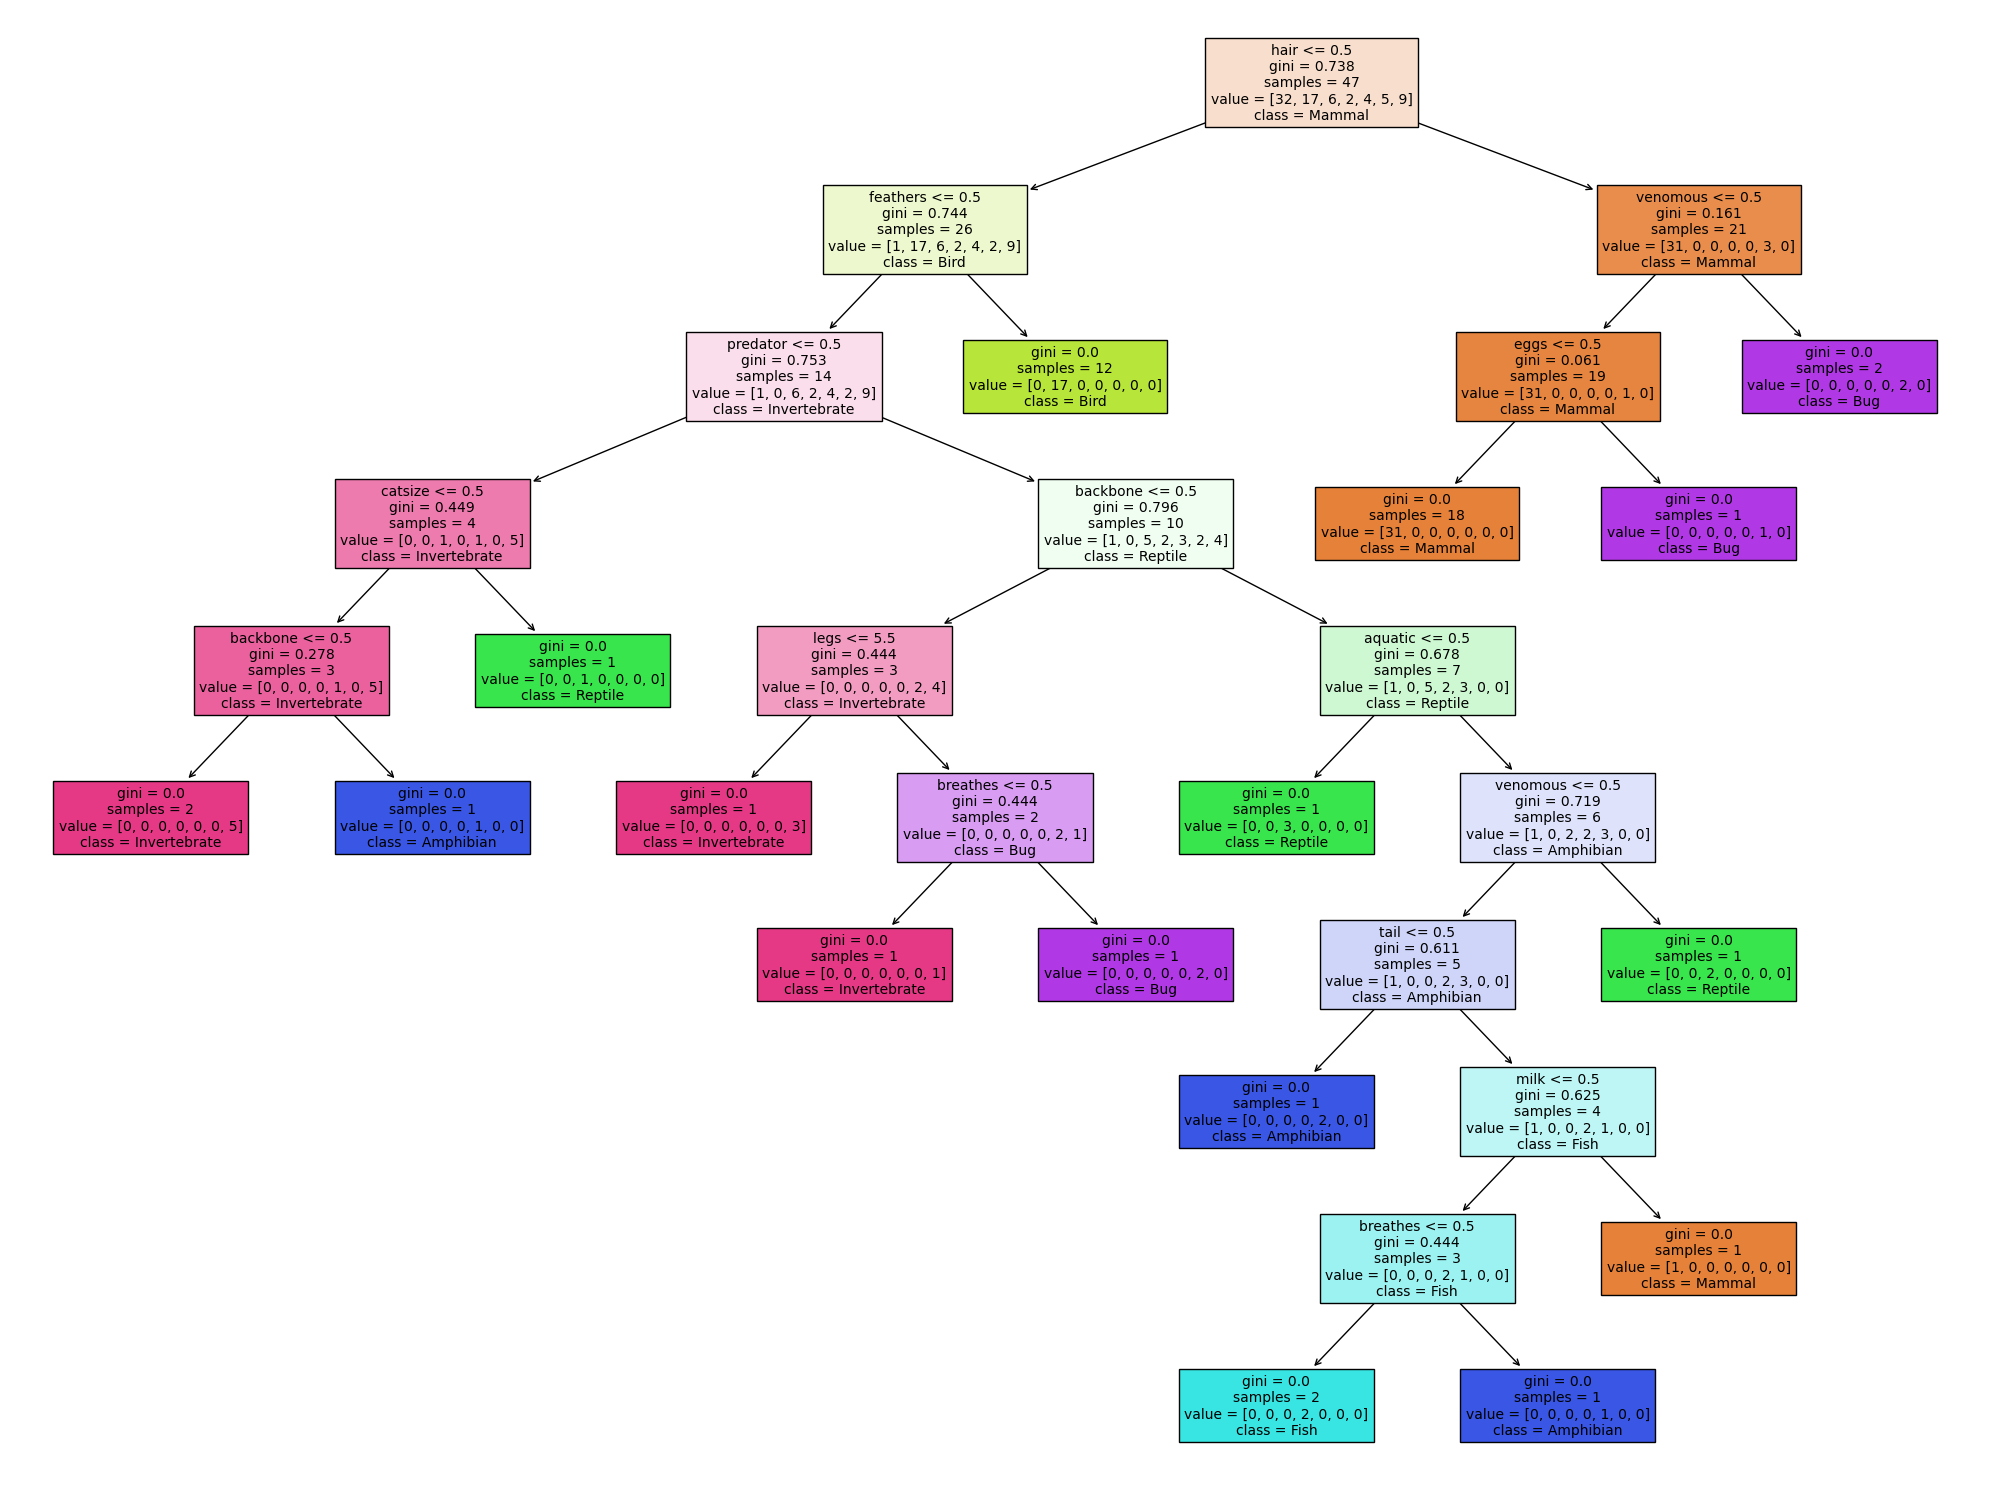

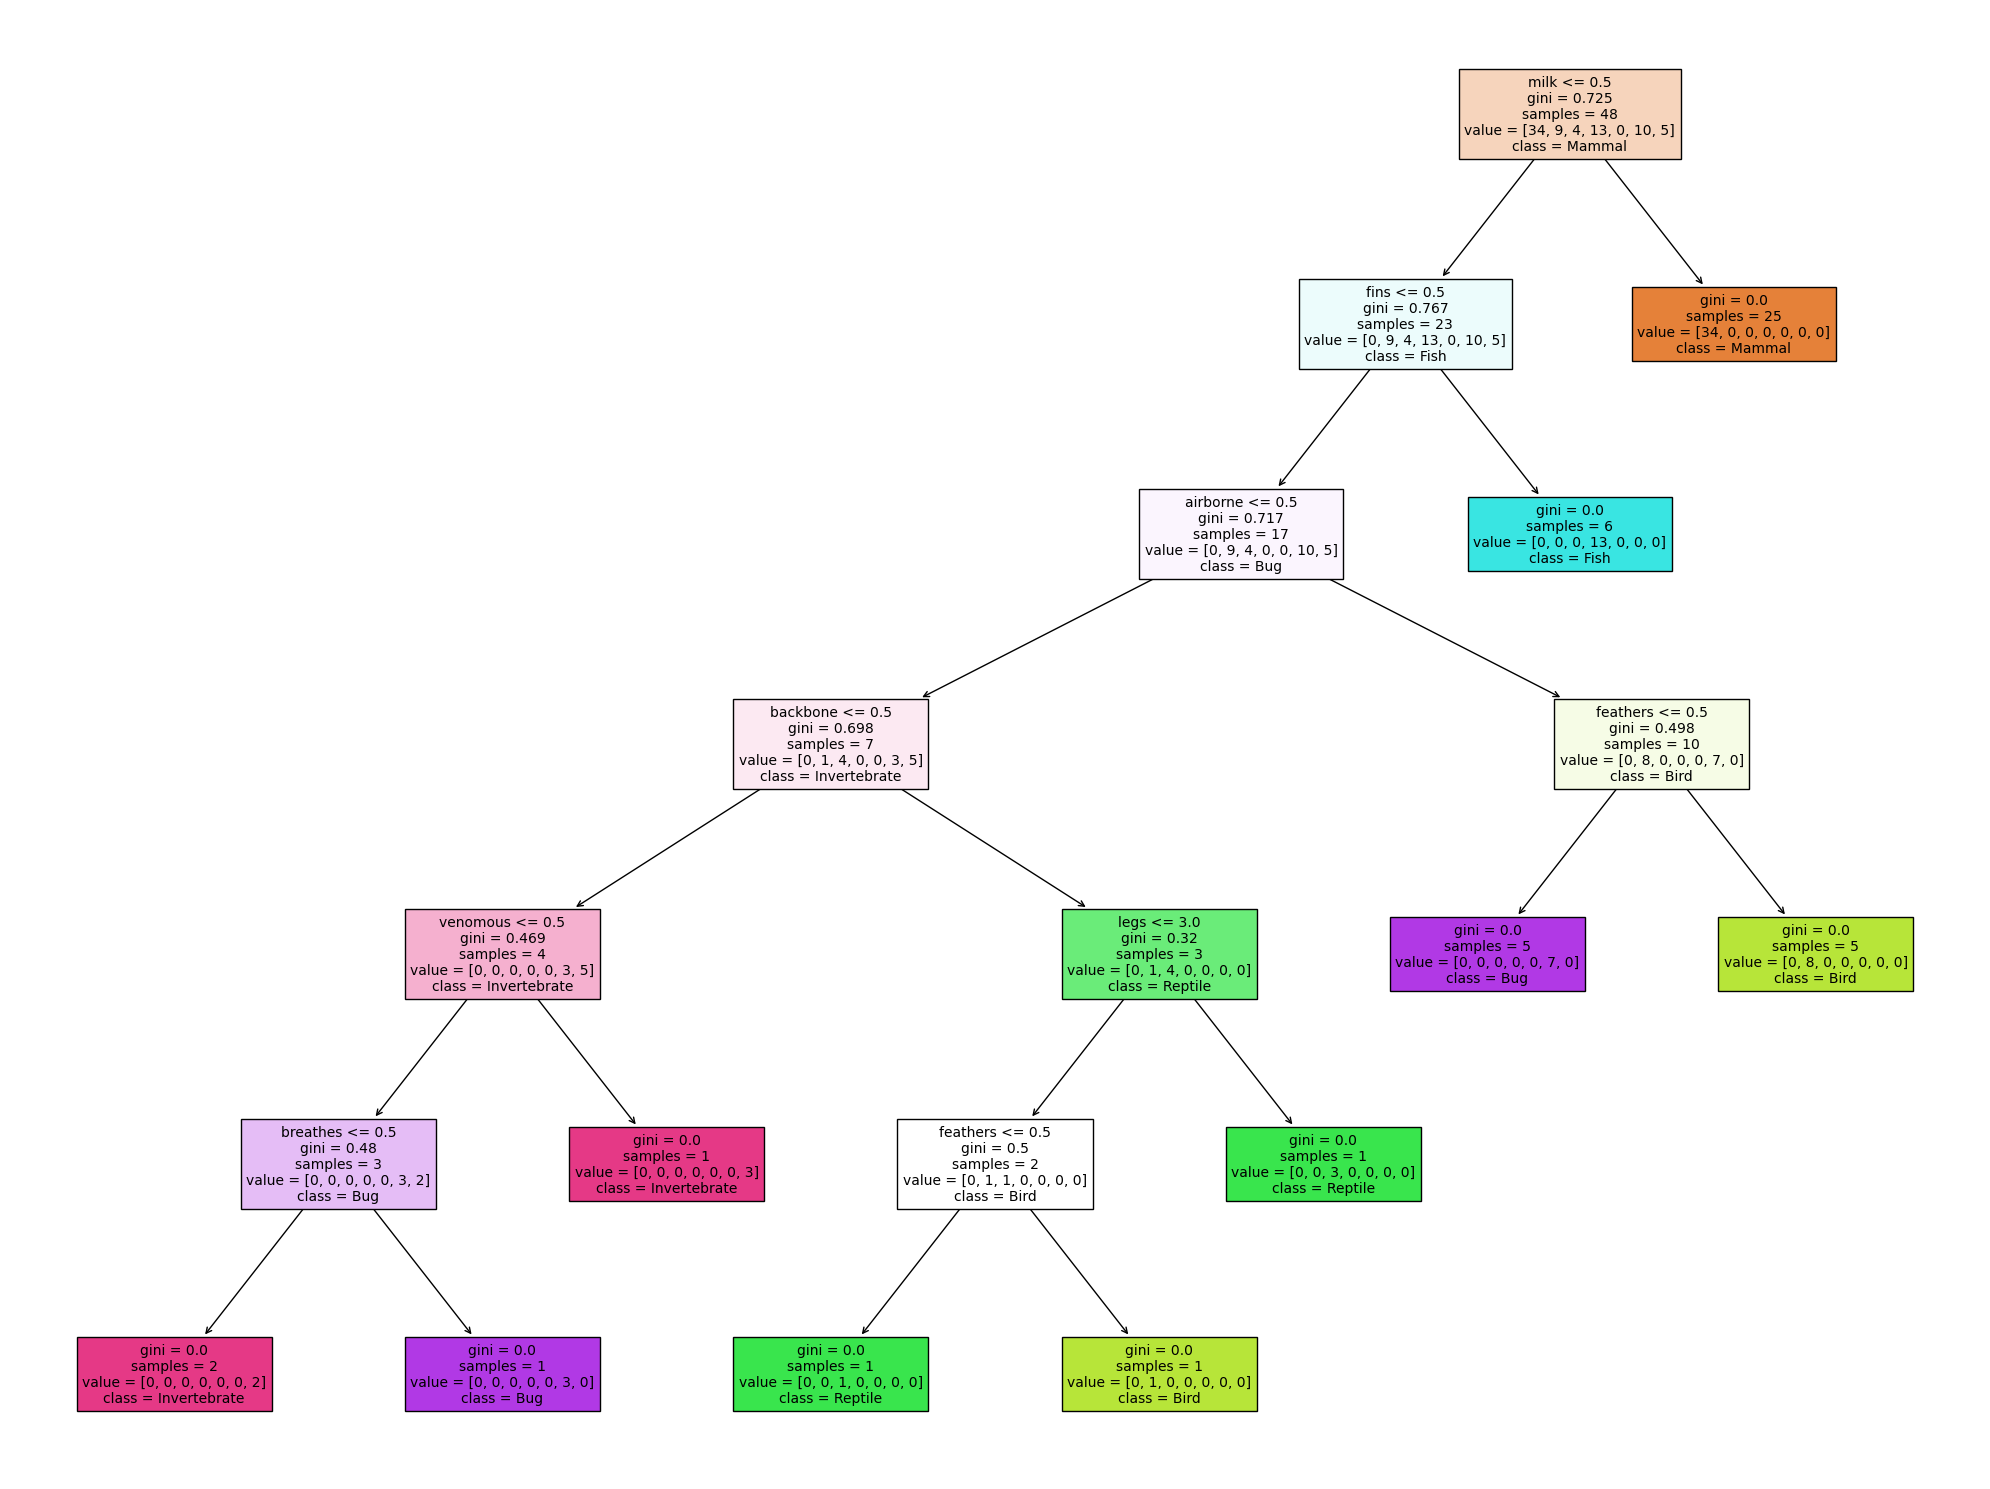

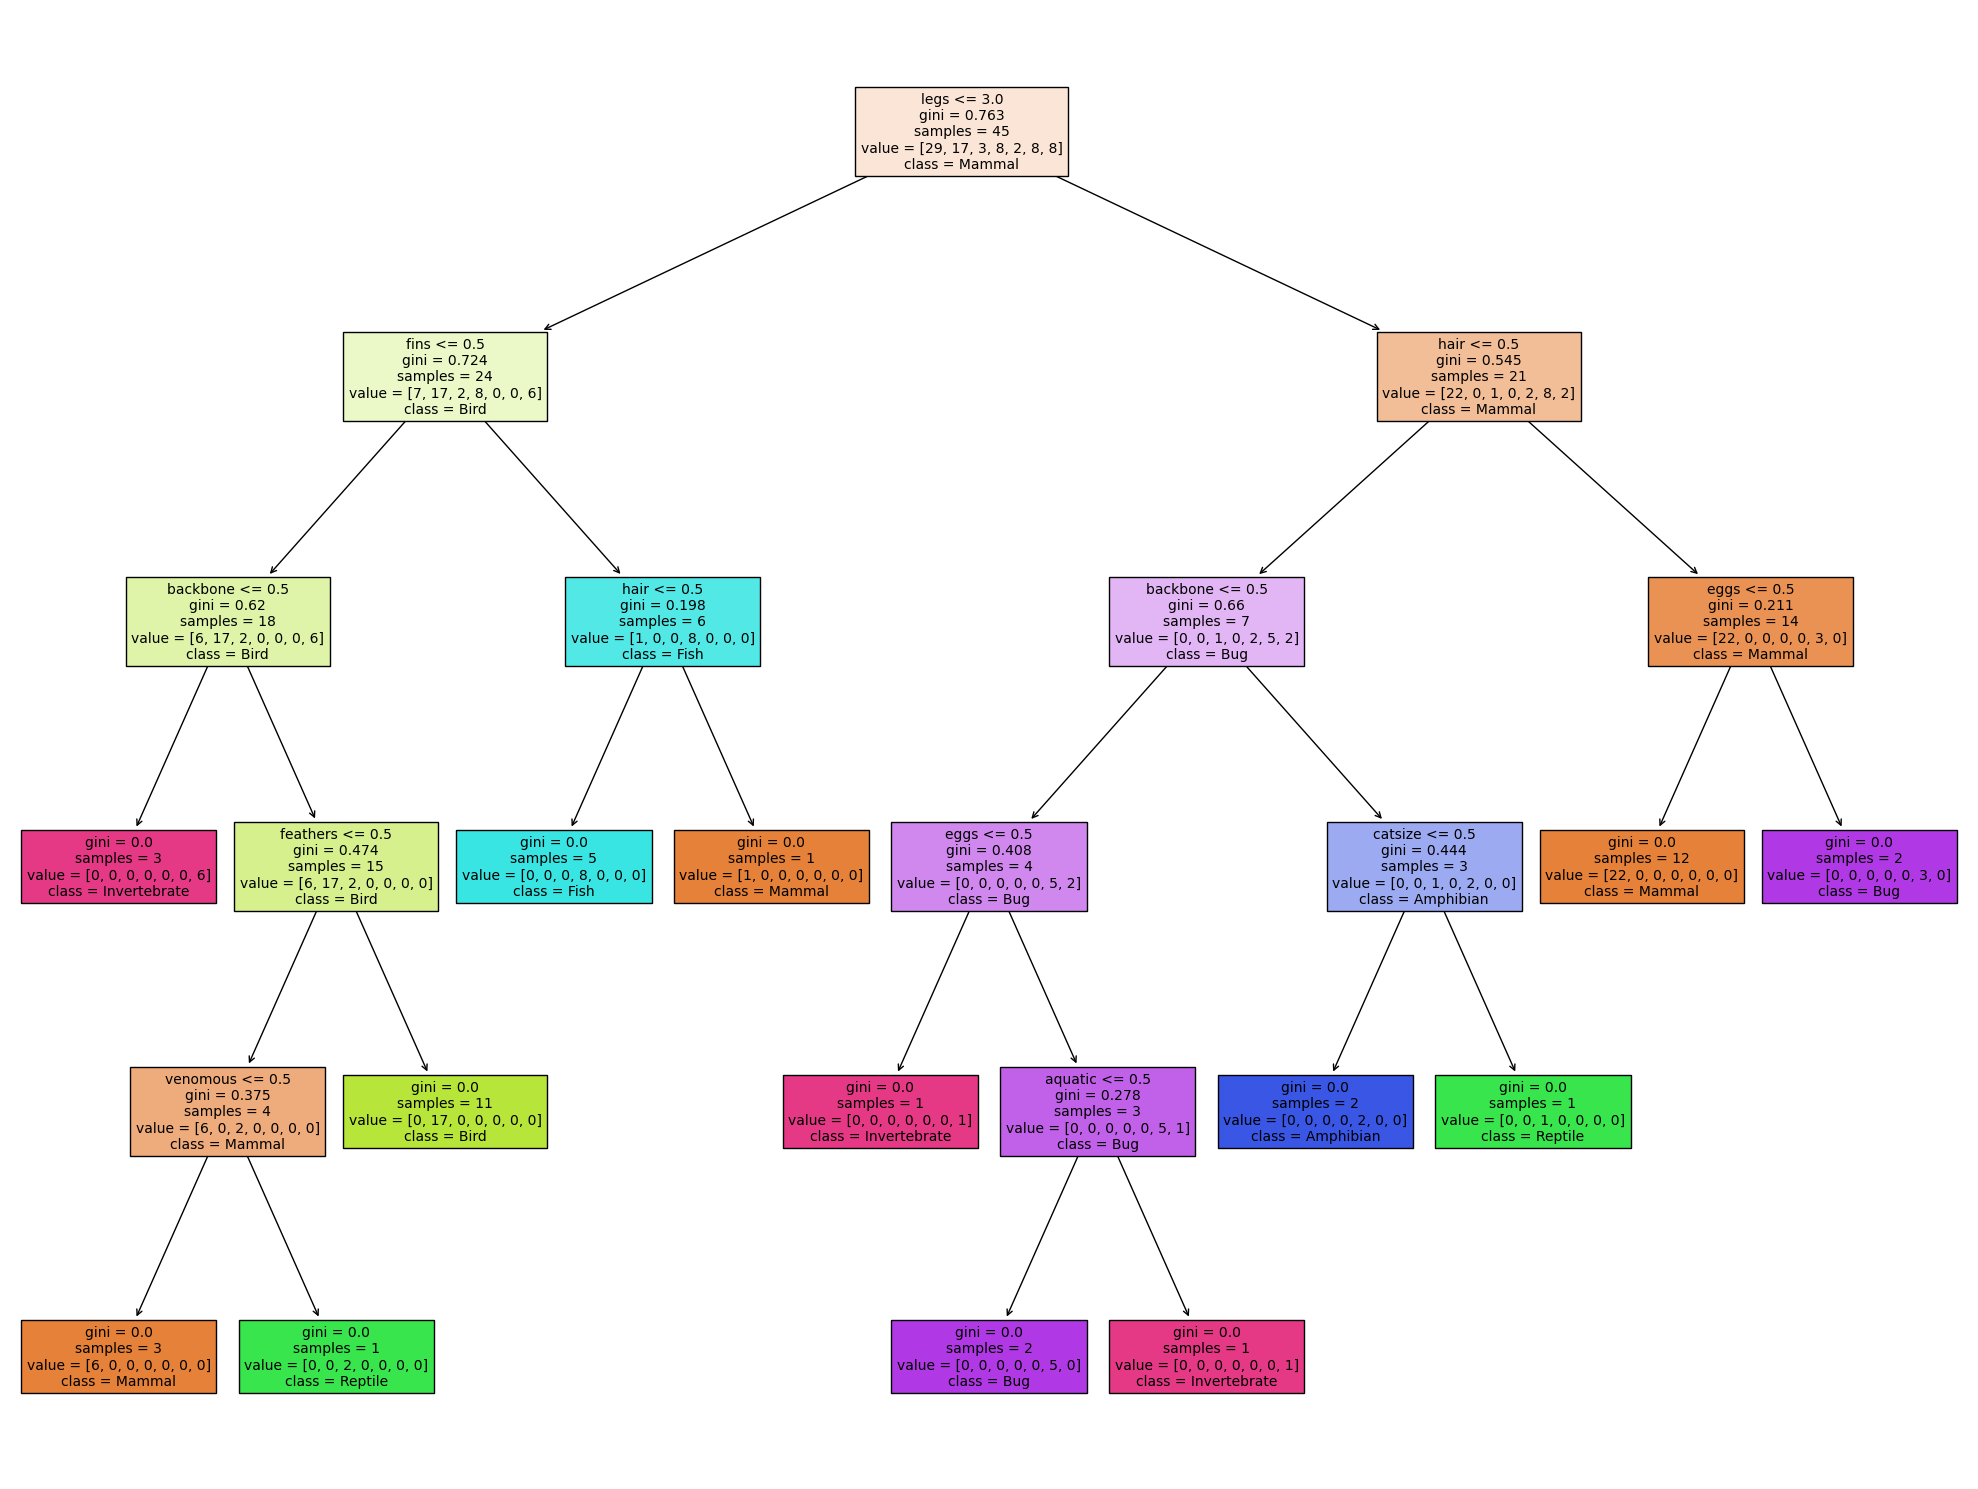

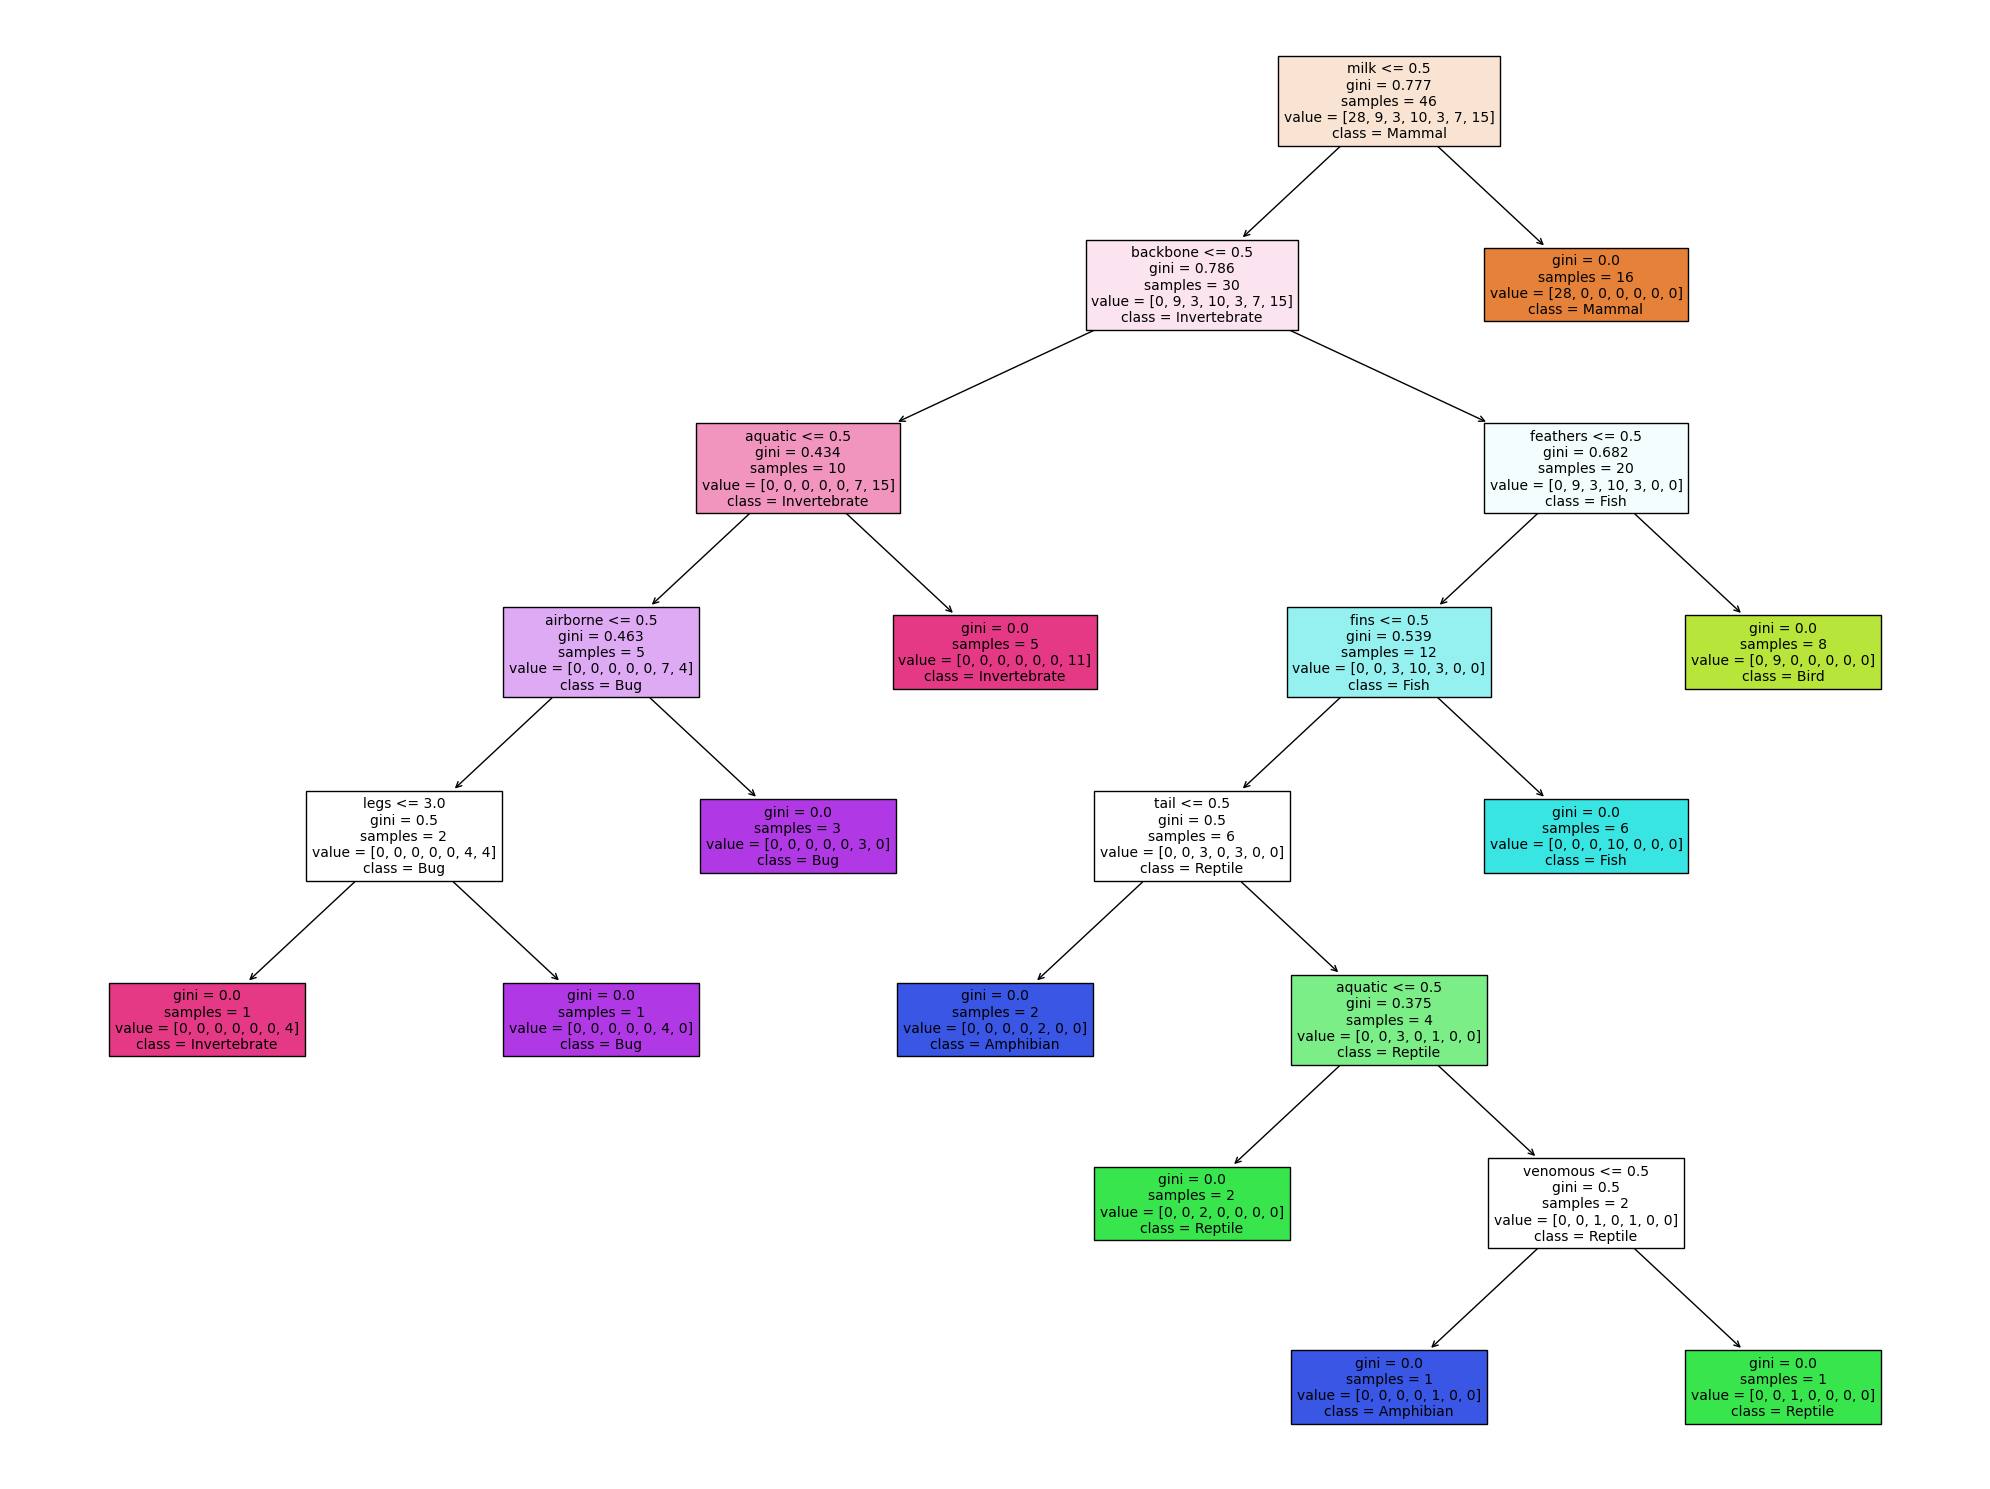

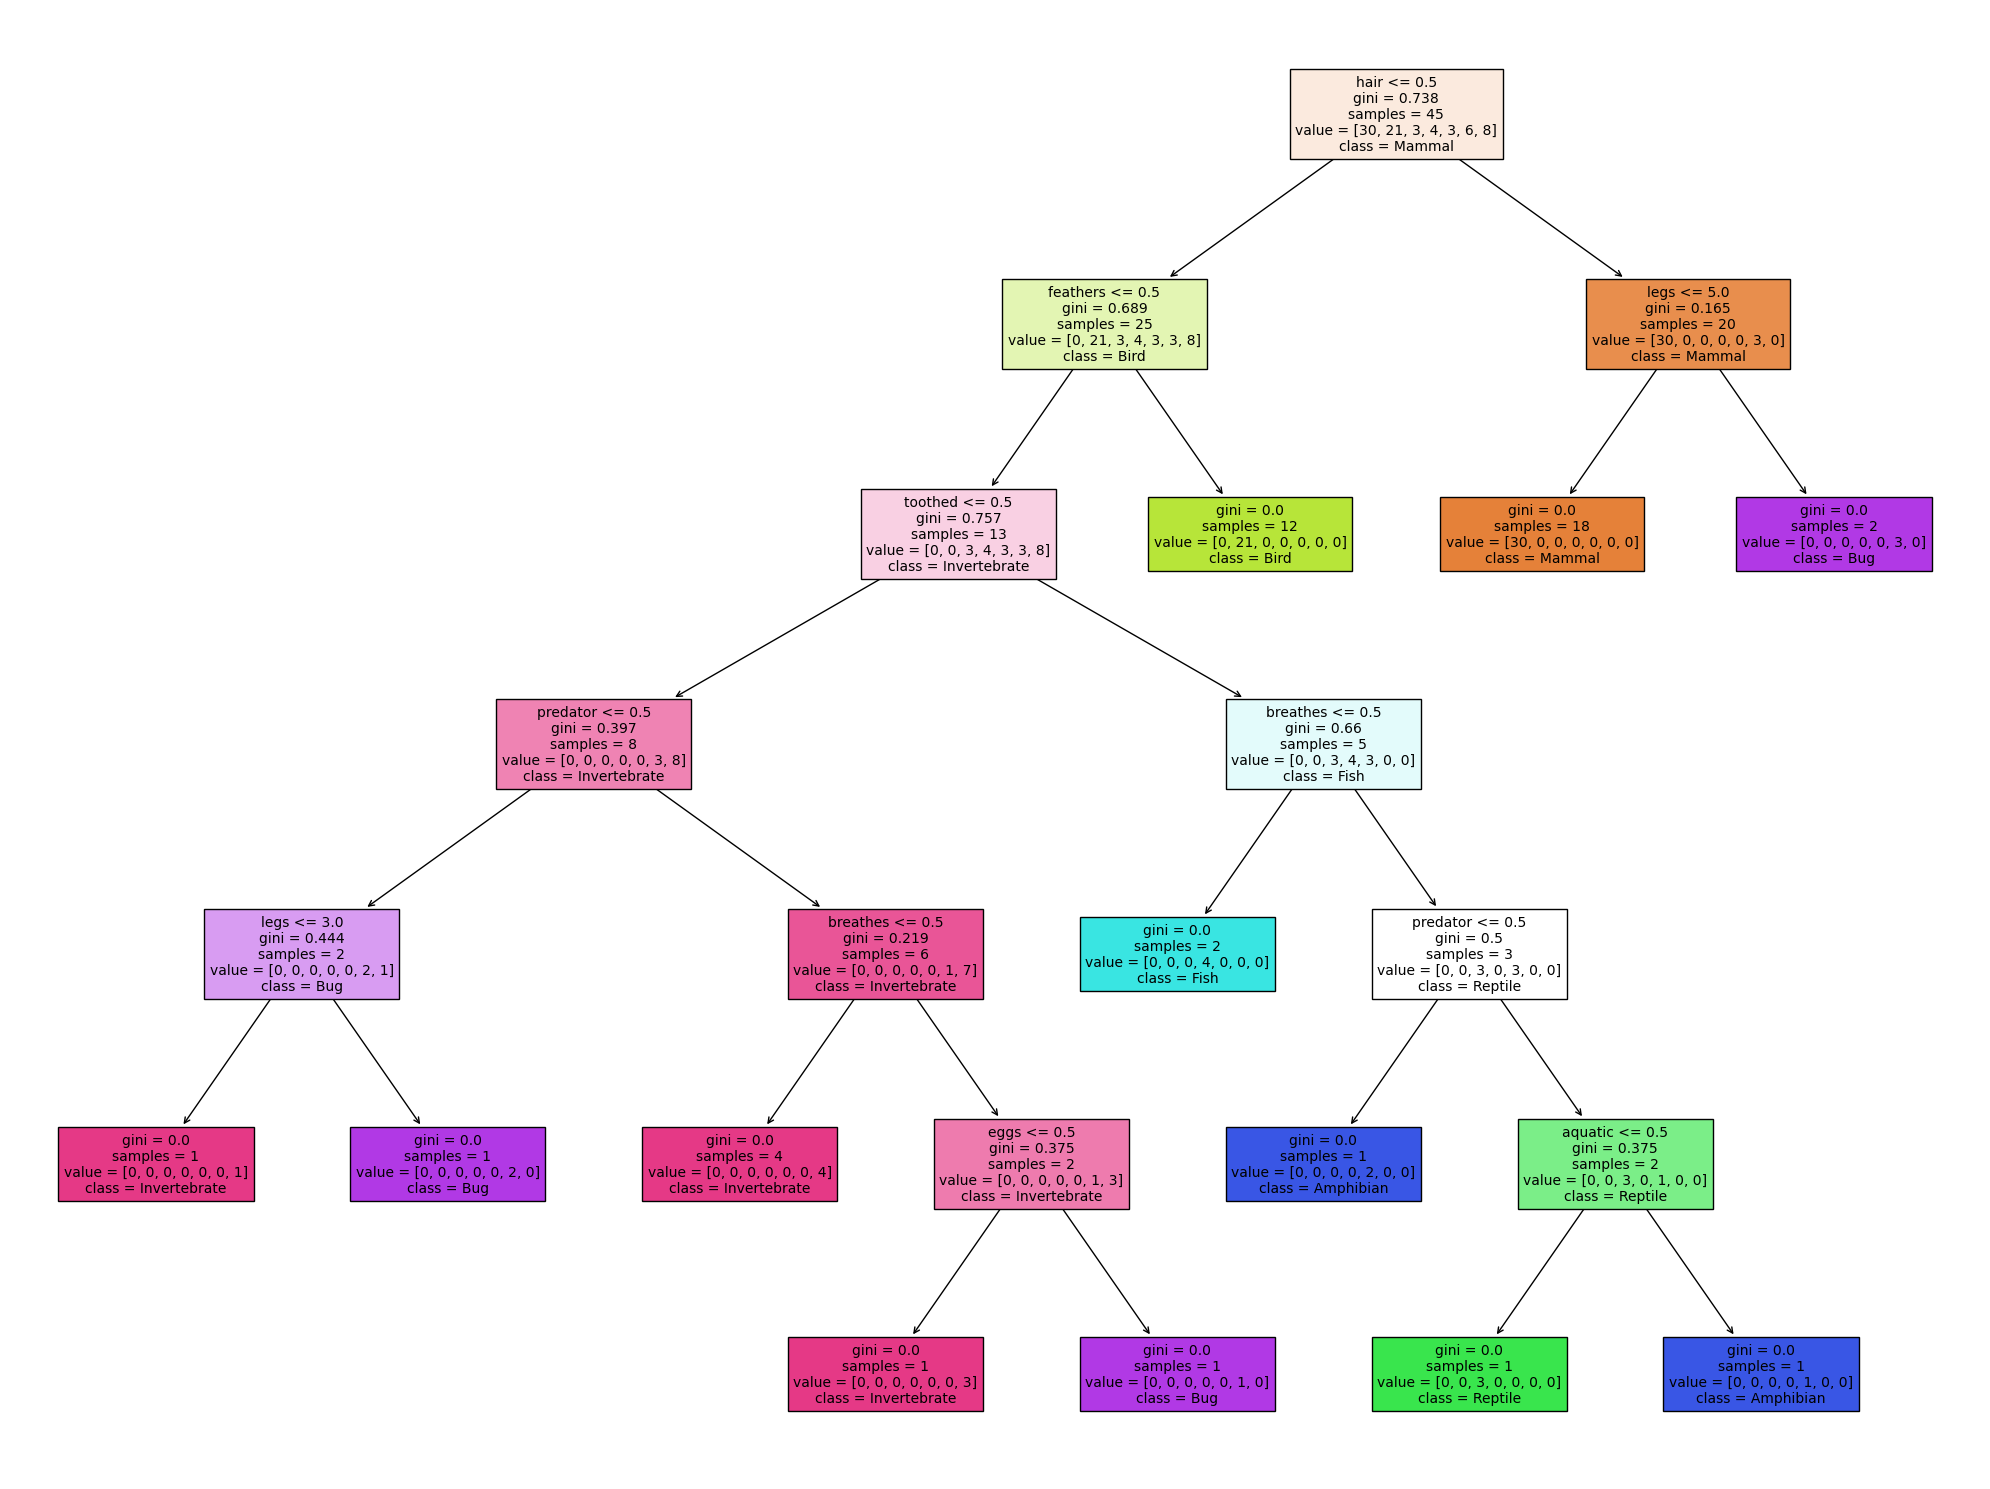

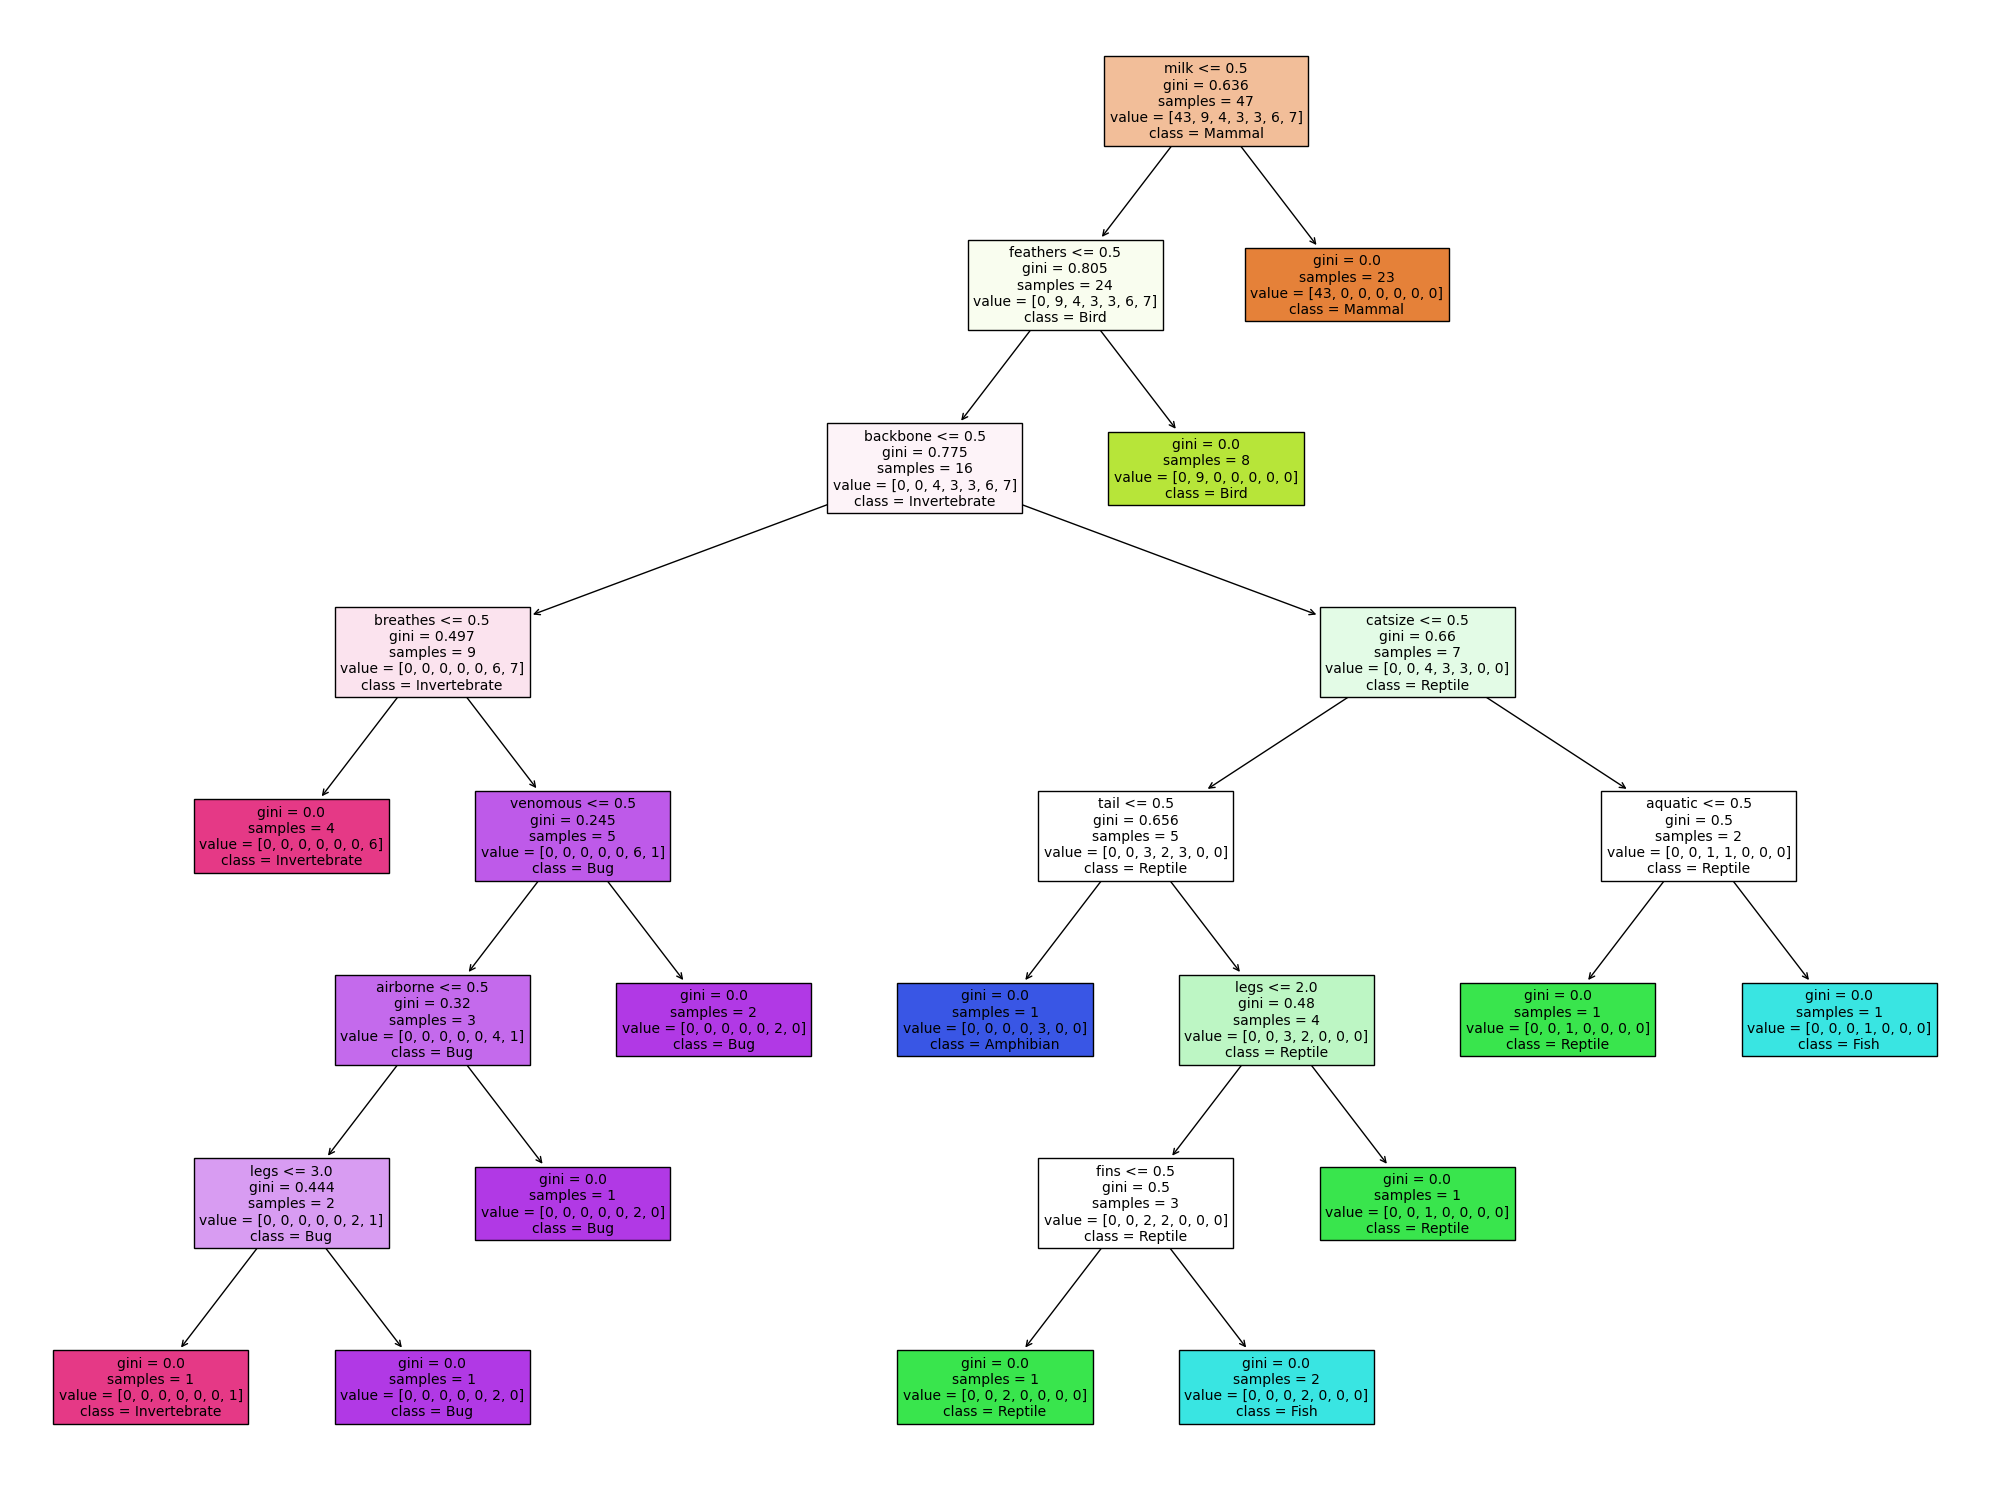

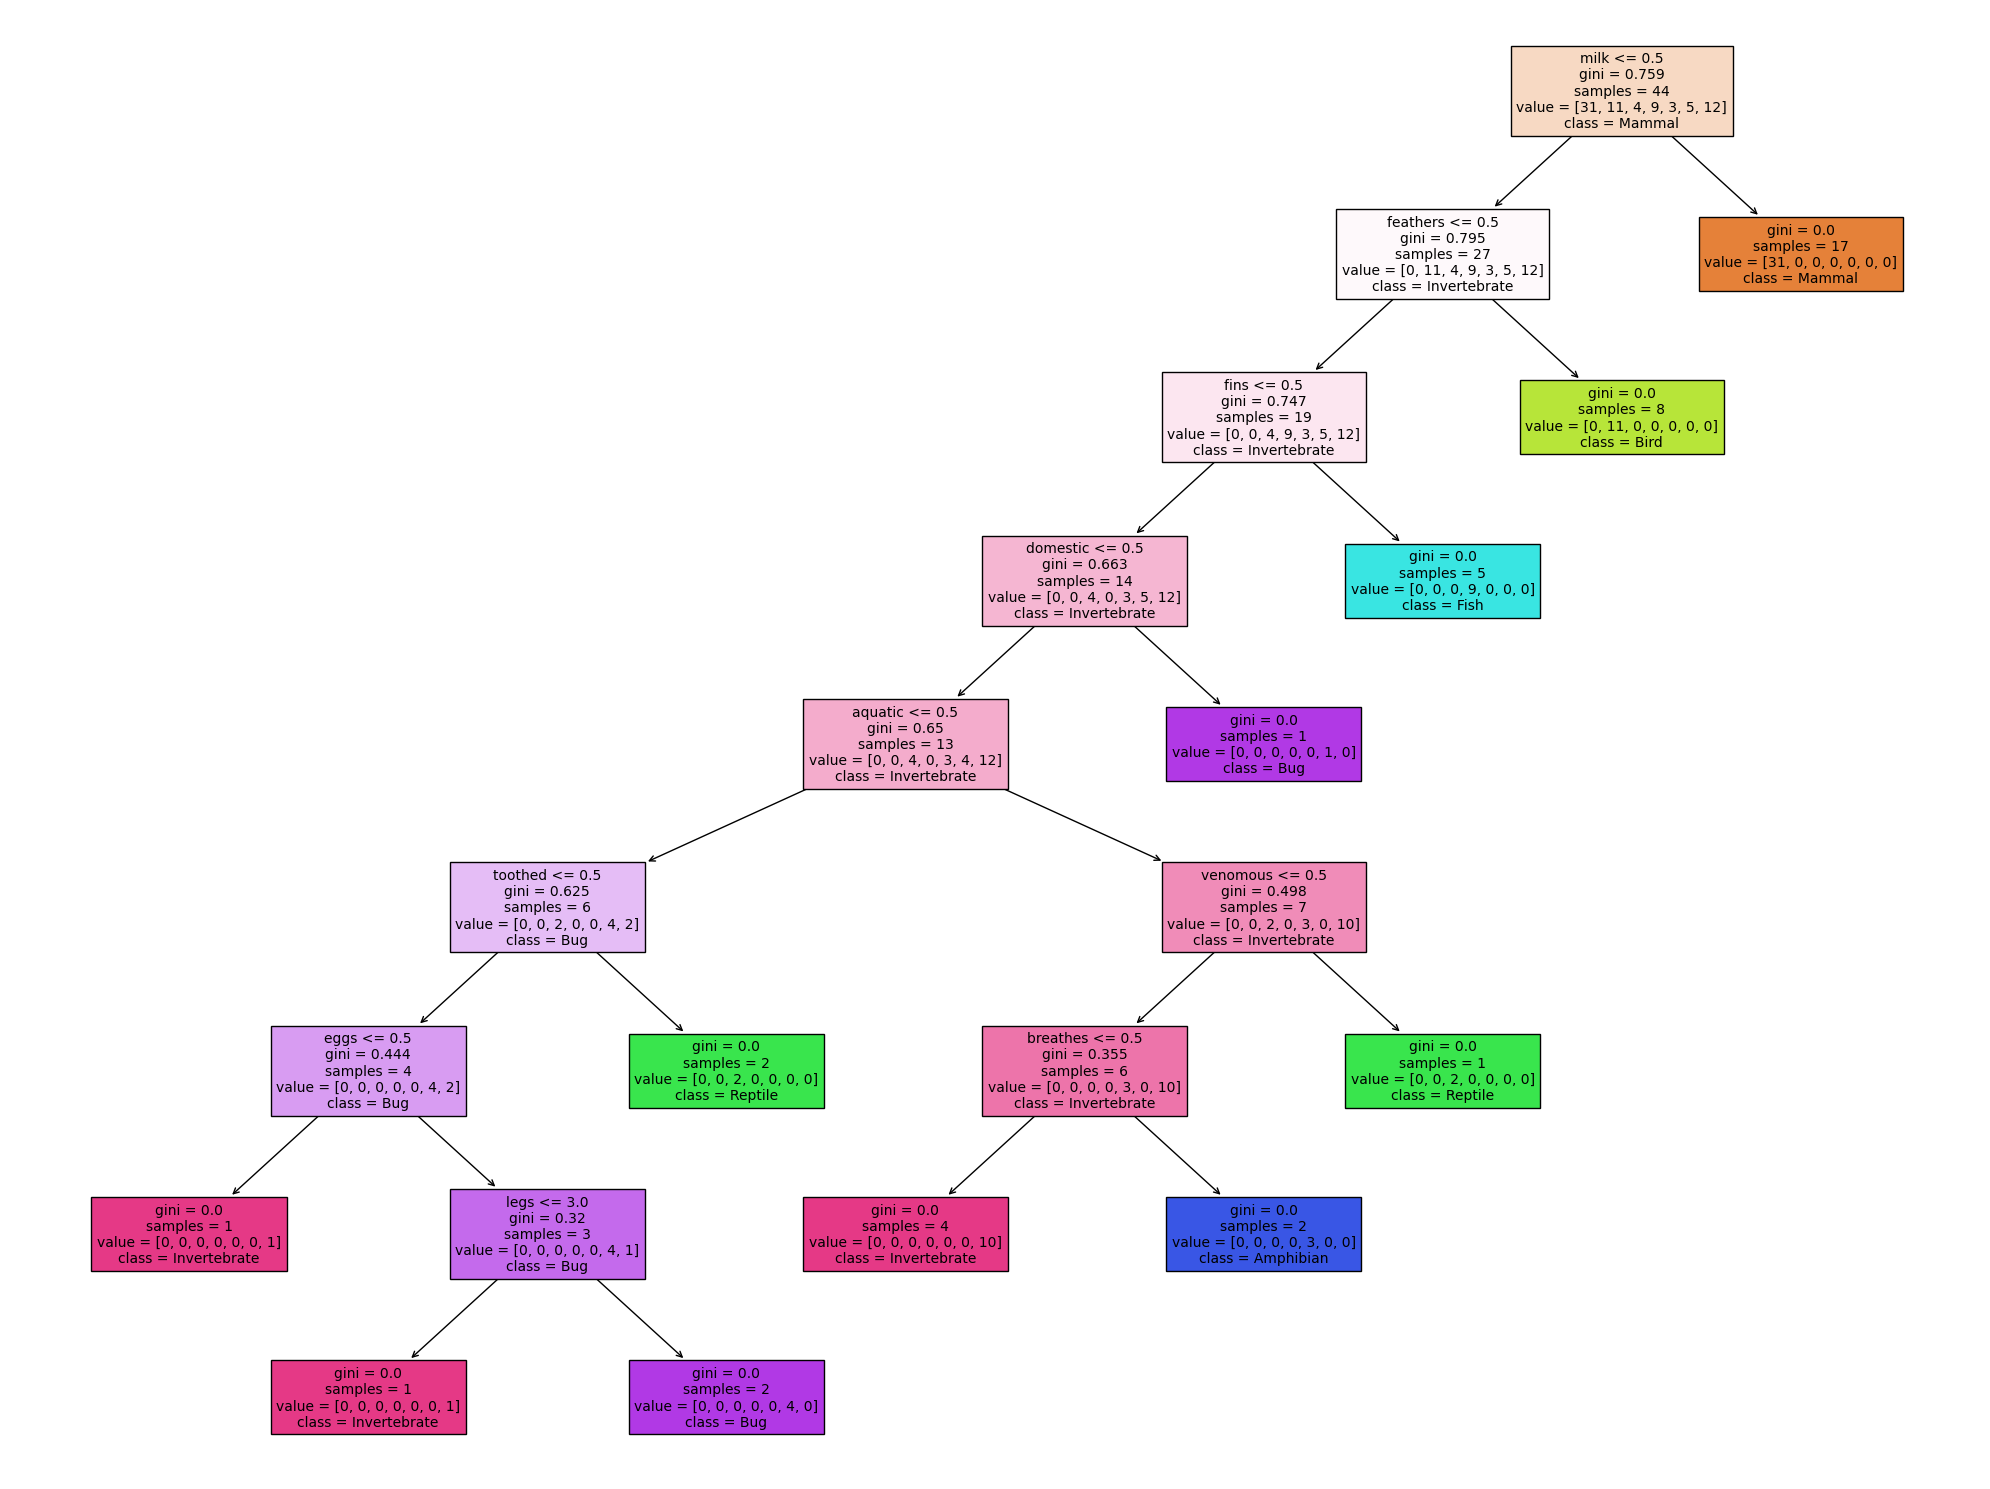

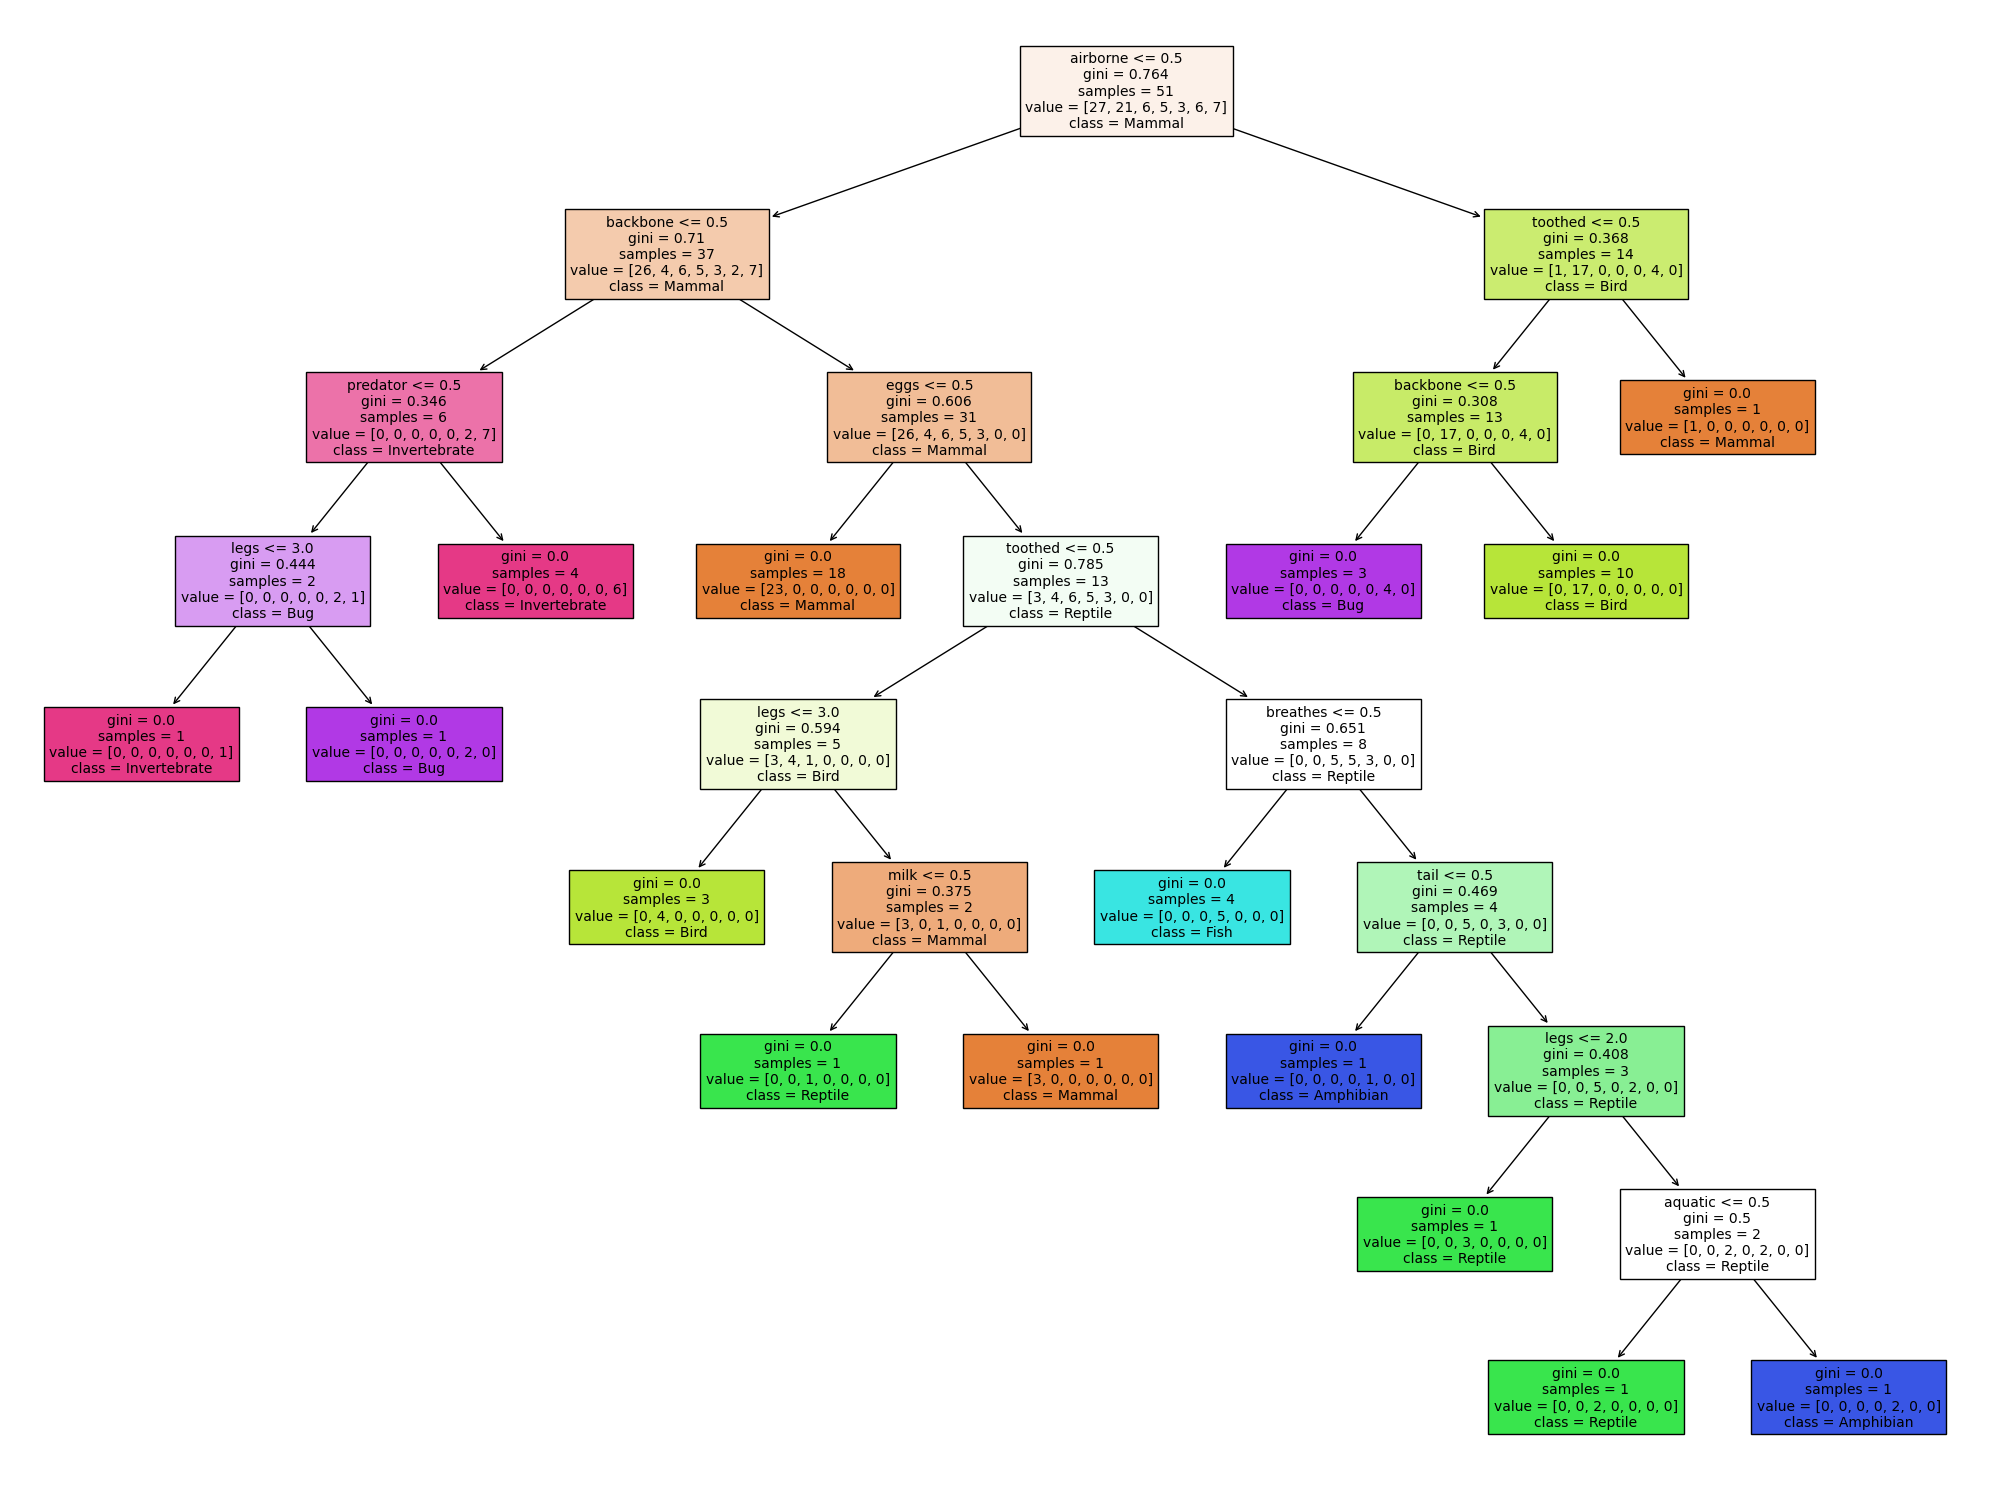

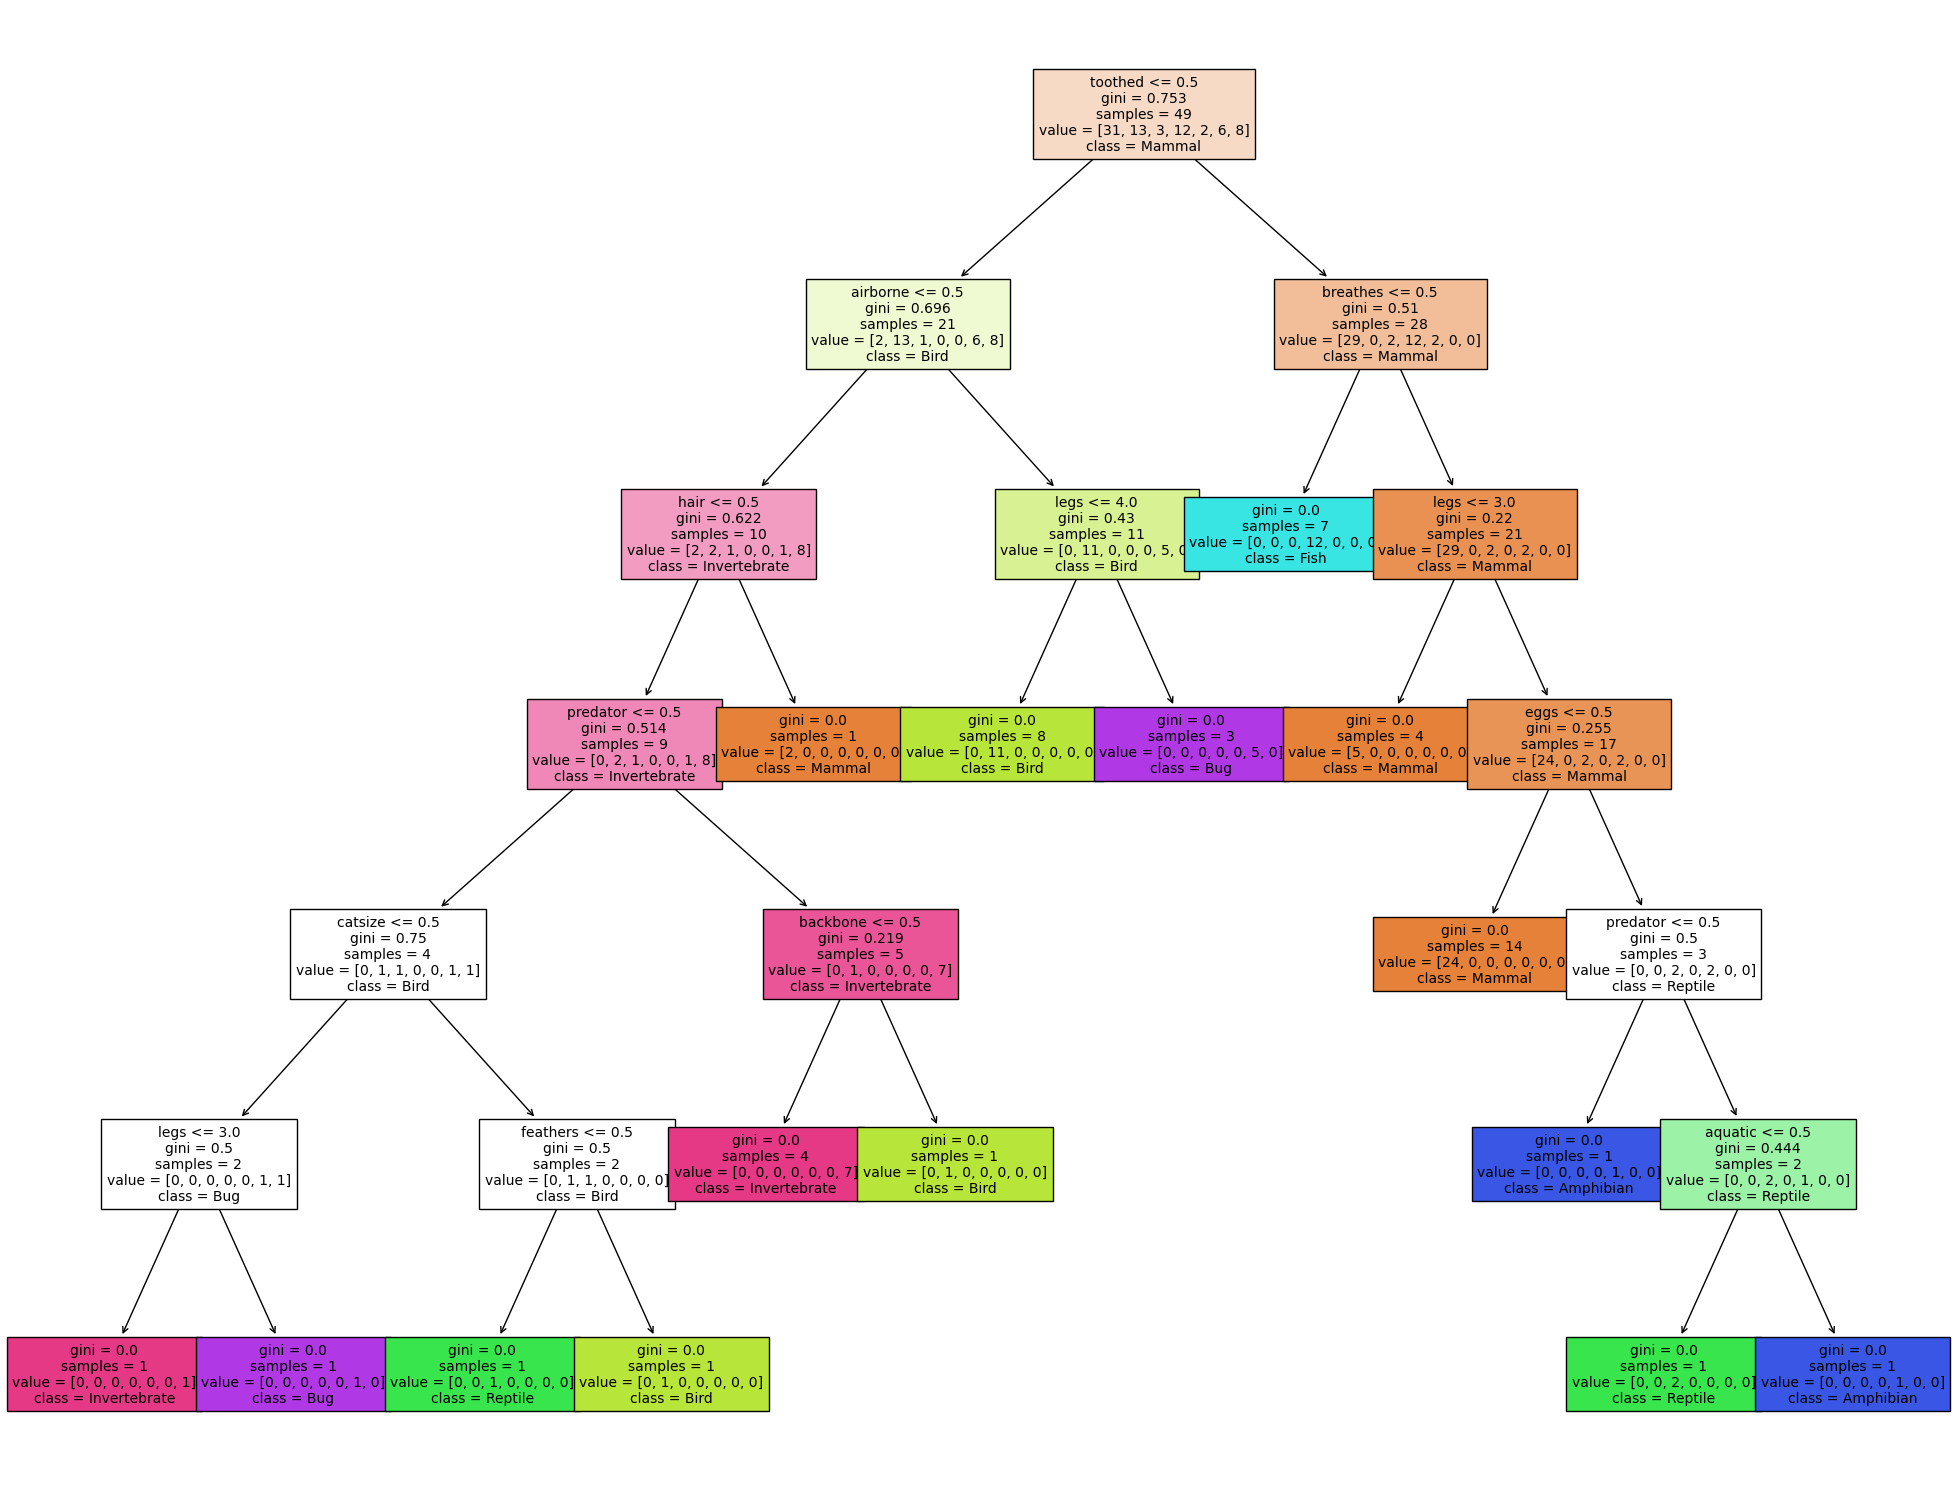

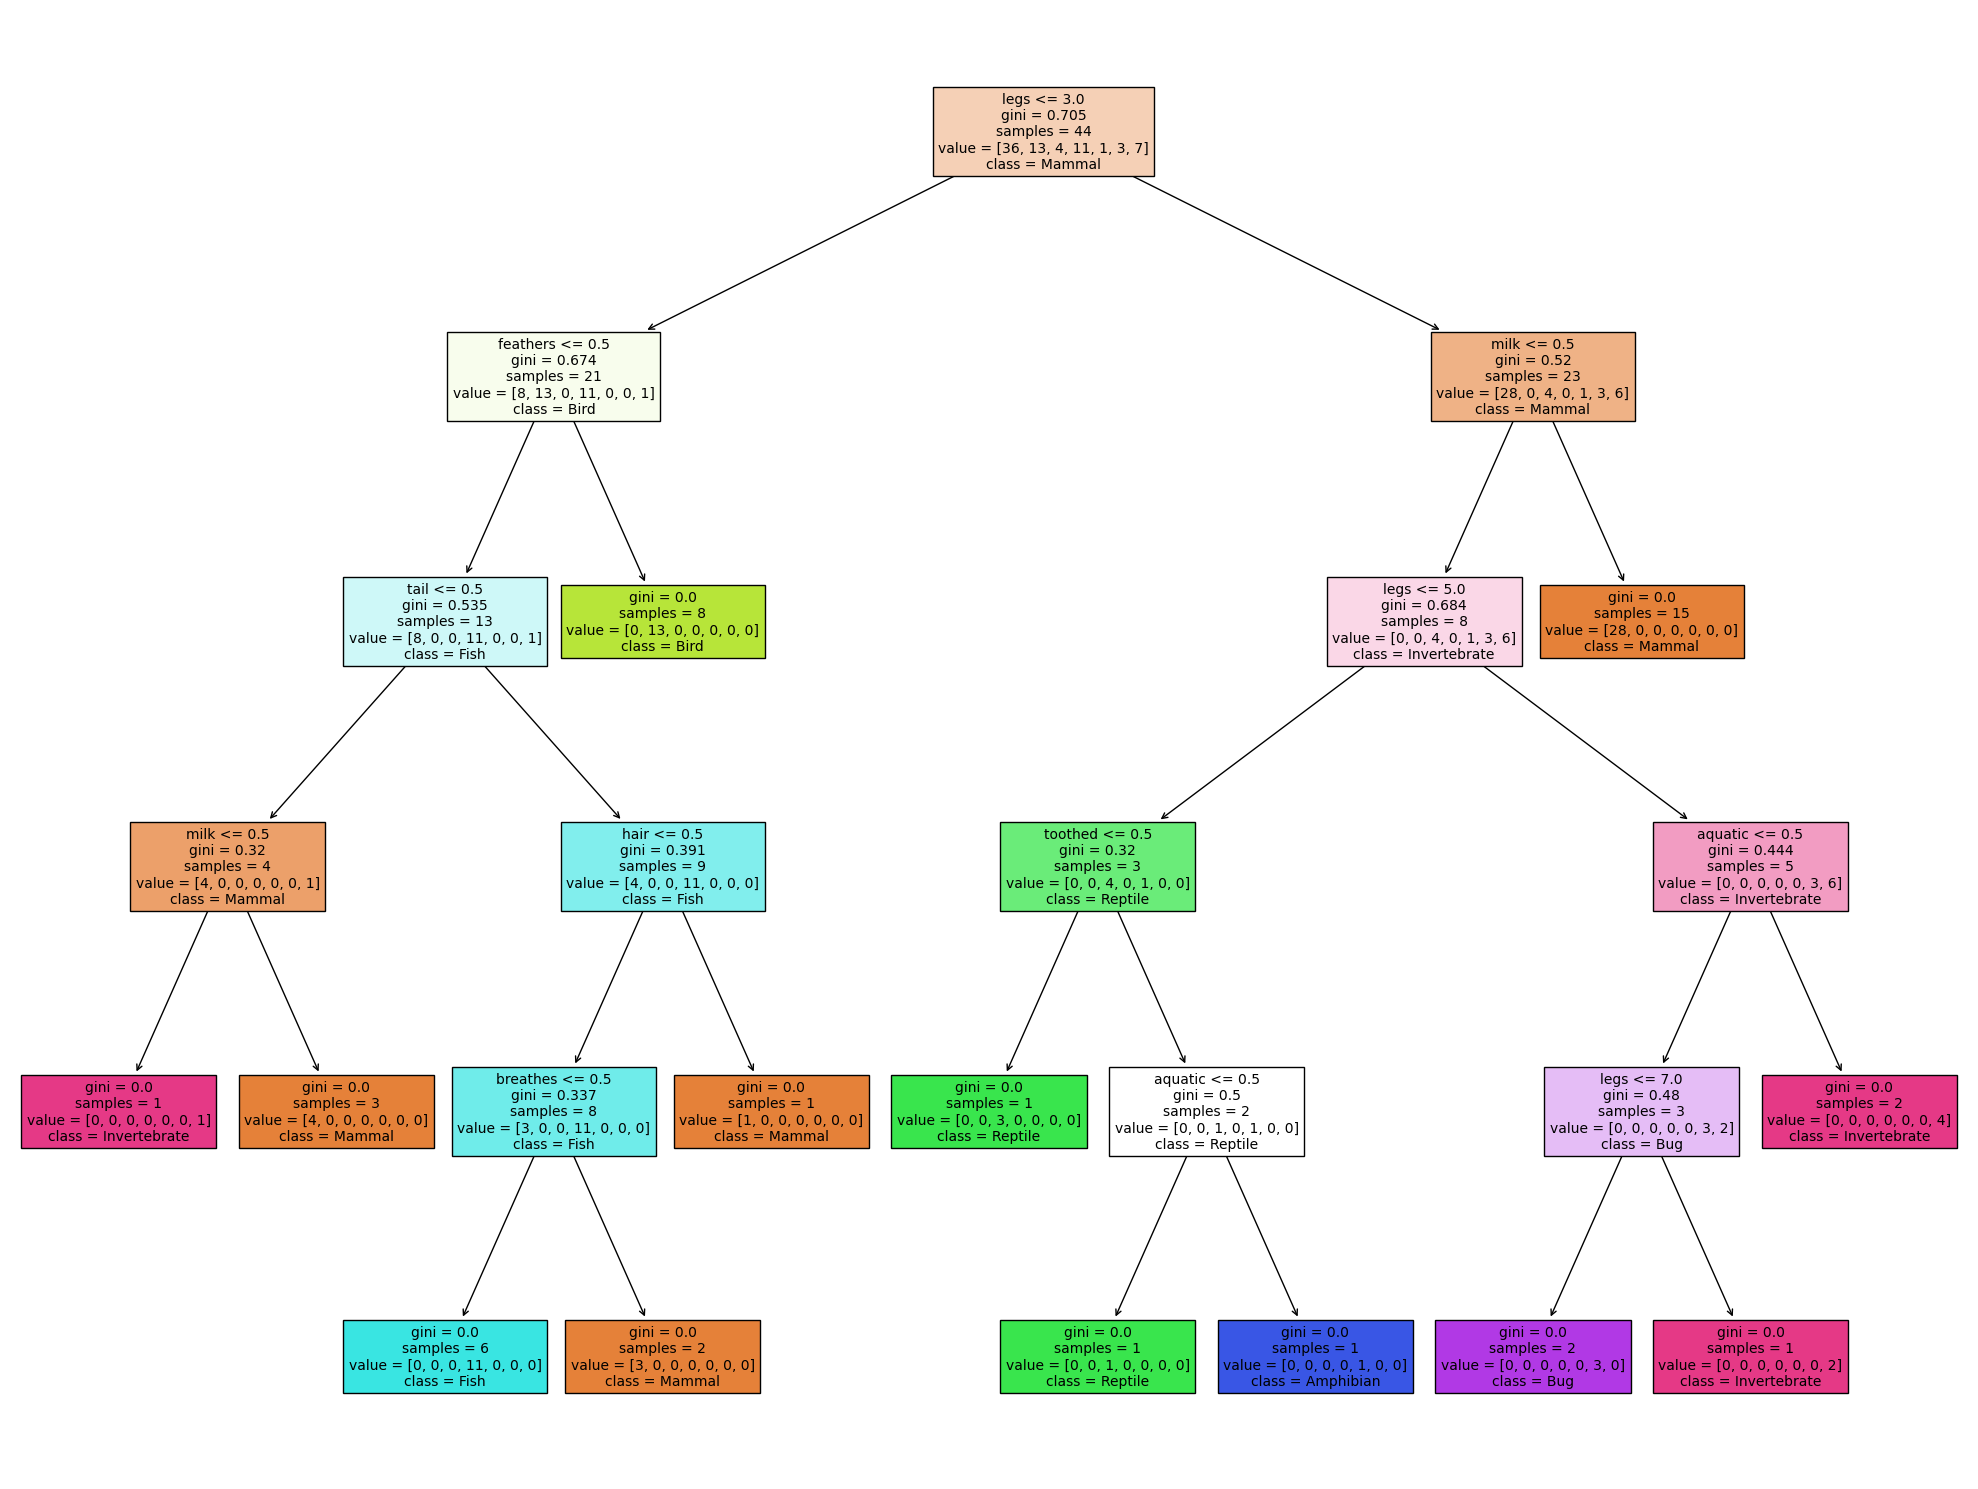

In [151]:
from sklearn.tree import plot_tree

for i in range(len(rf.estimators_)):
    plt.figure("Decison Tree", figsize = [20,15])
    plot_tree(rf.estimators_[i], fontsize = 10, filled = True, feature_names = features, class_names = target)
    plt.tight_layout()
    plt.show()